In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.cosmology import FlatLambdaCDM, Planck18
from astropy import units as u
import gwdet
from pdet import p_det_median, VT_pop_uniform

/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for r

In [2]:
p = gwdet.detectability()

In [3]:
m_min, m_max, m_len = 1, 100, 100
z_min, z_max, z_len = 1e-4, 2.2, 50
m = np.linspace(1, 100, m_len)
z = np.linspace(1e-4, 2.2, z_len)

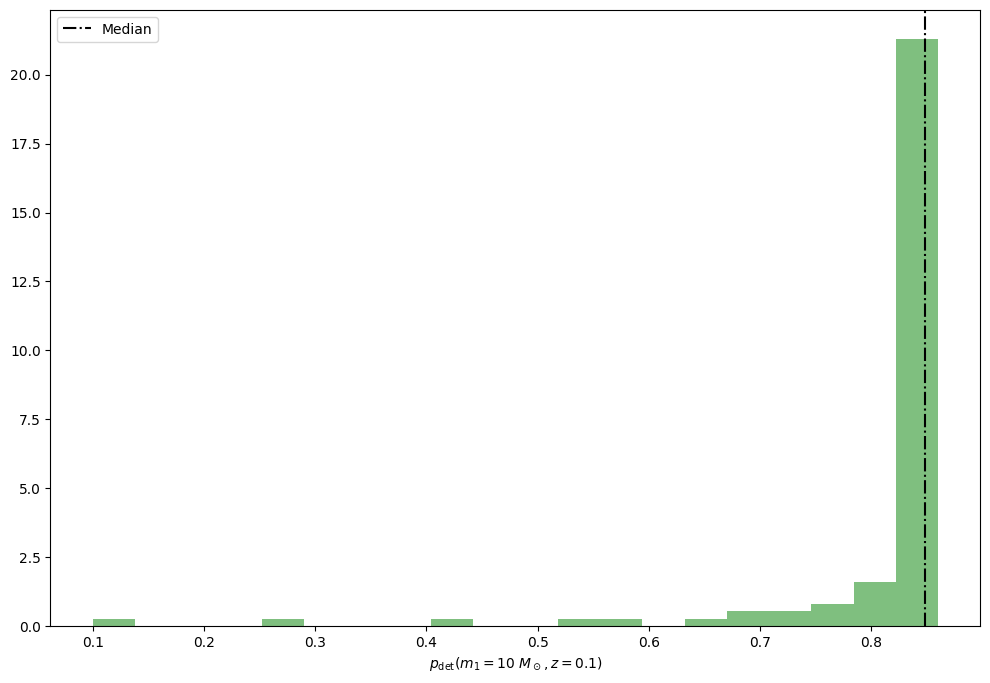

In [4]:
m_cell, z_cell = 10, 0.1

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_xlabel(r'$p_\text{{det}}(m_1 = {0}\ M_\odot, z = {1})$'.format(m_cell, z_cell))

p_det_cell = p(np.zeros(m_len) + m_cell, m, np.zeros(m_len) + z_cell)

ax.hist(p_det_cell, density=True, bins='auto', color='Green', alpha=0.5)
ax.axvline(np.median(p_det_cell), color='black', linestyle='-.', label='Median')

ax.legend()

plt.show()

In [5]:
if __name__ == '__main__':
    p_det = p_det_median(m, z)

Commputing median p_det for each (m, z) pair:   0%|          | 0/5000 [00:00<?, ?it/s]/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarni

In [6]:
# p_det = np.zeros((z_dim, m_dim))

# with tqdm(total=z_dim * m_dim) as pbar:
#     for _z, i in zip(z, range(z_dim)):
#         pbar.set_description_str('z: {i}/{z_dim}'.format(i=i, z_dim=z_dim))
#         for _m, j in zip(m, range(m_dim)):
#             p_det[i, j] = np.median(p(np.zeros(m_dim) + _m, m, np.zeros(m_dim) + _z))
#             pbar.update(1)

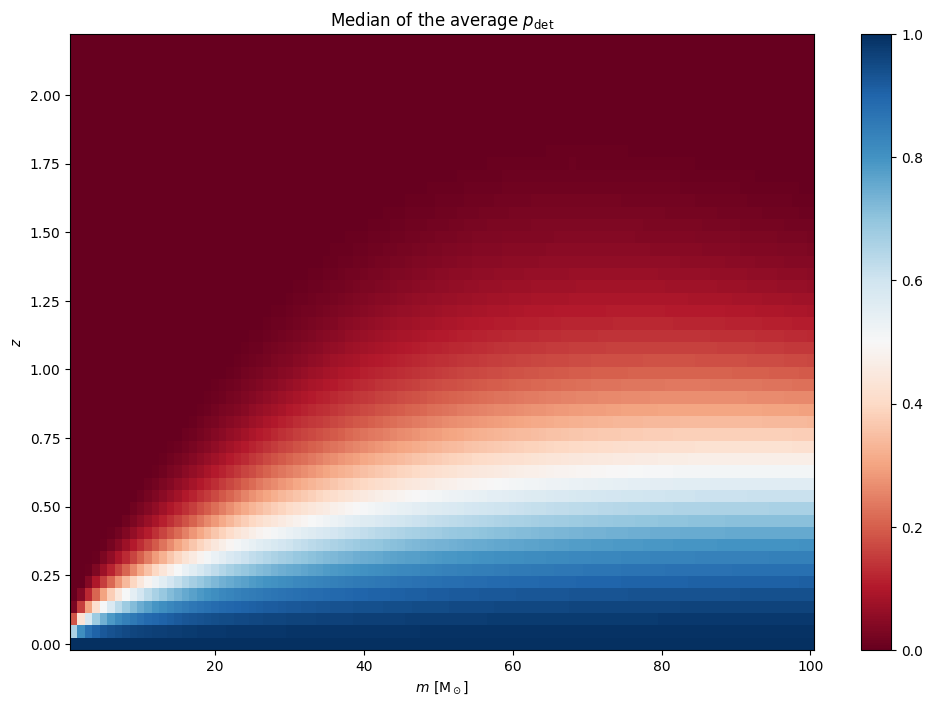

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'Median of the average $p_\text{det}$')
ax.set_xlabel(r'$m\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m, z, p_det, cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=1))

fig.colorbar(im, ax=ax)

plt.show()

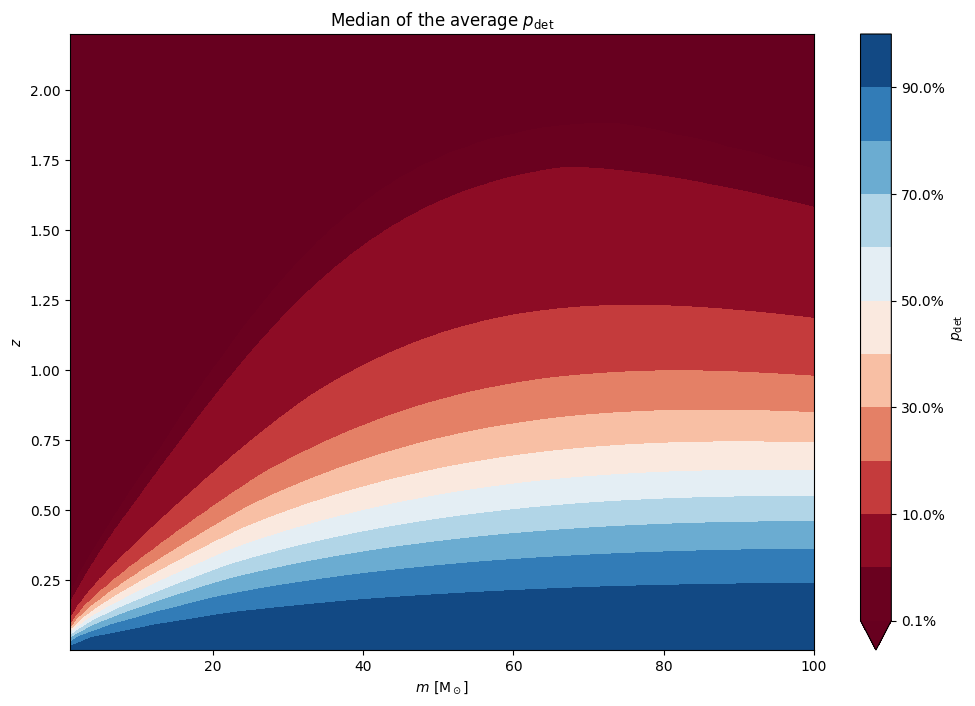

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'Median of the average $p_\text{det}$')
ax.set_xlabel(r'$m\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
levels = [1e-3, 1e-2, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
cf = ax.contourf(m, z, p_det, levels=levels, cmap=cmap, extend='min')

fig.colorbar(cf, ax=ax, label=r'$p_\text{det}$', format=mpl.ticker.PercentFormatter(1, decimals=1))

plt.show()

In [9]:
if __name__ == '__main__':
    VT = VT_pop_uniform(1, z, m)

Computing VT for each (m, z) pair for a uniformly distributed population of sources:   0%|          | 0/4851 [00:00<?, ?it/s]/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/site-packages/pykerr/qnm.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Users/Federico/Documents/Corsi di studio/Università/Tesi/master_thesis/.venv/lib/python3.11/s

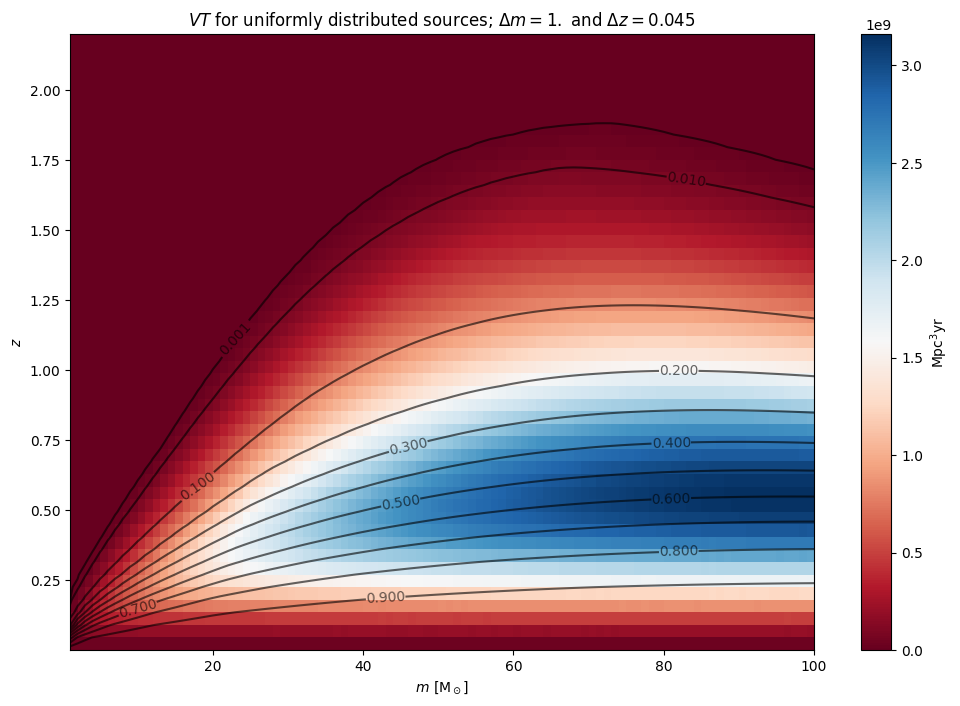

In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'$VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$'.format(np.format_float_positional((m_max - m_min) / (m_len - 1), 3),
                                                                                                     np.format_float_positional((z_max - z_min) / (z_len - 1), 3)))
ax.set_xlabel(r'$m\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['RdBu']
im = ax.pcolormesh(m, z, VT, cmap=cmap, norm=mpl.colors.Normalize(vmin=np.min(VT), vmax=np.max(VT)))

cf = ax.contour(m, z, p_det, levels=levels, colors='black', alpha=0.6)
ax.clabel(cf)

cbar = fig.colorbar(im, ax=ax, label=r'$\text{Mpc}^3 \text{yr}$')

plt.show()

/var/folders/05/2fbv44555hx420qclxnfbd4c0000gn/T/ipykernel_36377/2348828498.py:4: RuntimeWarning: divide by zero encountered in divide
  VT_ratio_map = target_VT / VT


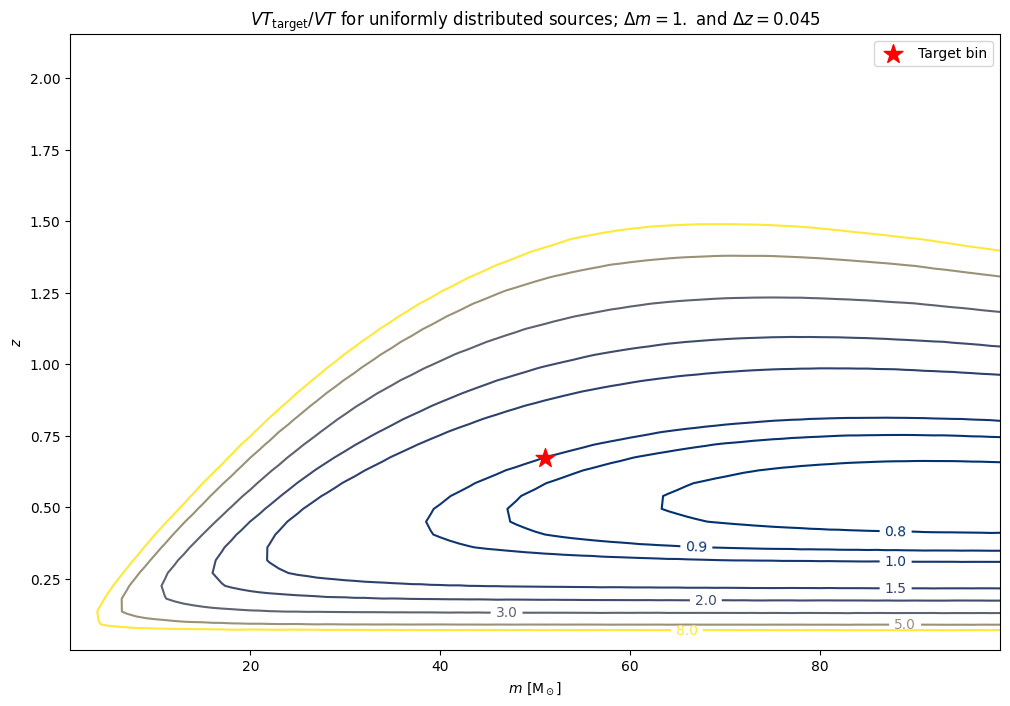

In [ ]:
target_bin = (50, 15)

target_VT = VT.T[*target_bin]
VT_ratio_map = target_VT / VT

fig, ax = plt.subplots(figsize=(12, 8))

ax.set_title(r'${{VT}}_\text{{target}} / VT$ for uniformly distributed sources; $\Delta m = {0}$ and $\Delta z = {1}$'.format(np.format_float_positional((m_max - m_min) / (m_len - 1), 3),
                                                                                                                              np.format_float_positional((z_max - z_min) / (z_len - 1), 3)))
ax.set_xlabel(r'$m\ [\text{M}_\odot$]')
ax.set_ylabel(r'$z$')

cmap = plt.colormaps['cividis']
levels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 3, 5, 8]

cf = ax.contour(m[:-1], z[:-1], VT_ratio_map, levels=levels, cmap=cmap)
ax.clabel(cf)

ax.scatter(m[target_bin[0]], z[target_bin[1]], color='red', marker='*', s=200, zorder=100, label='Target bin')

ax.legend()

plt.show()